<IPython.core.display.Javascript object>


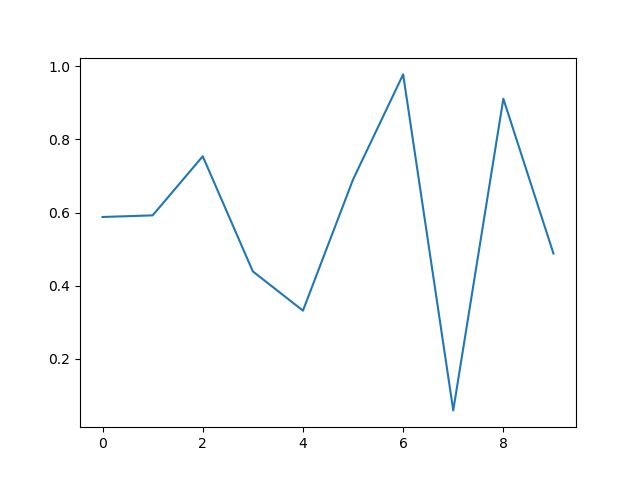

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


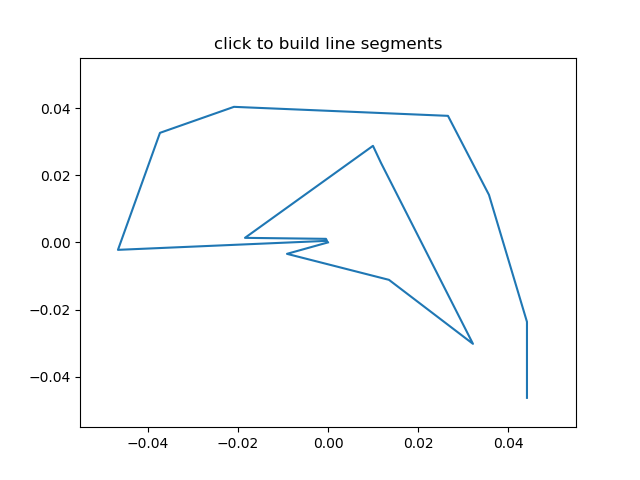

In [7]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()